Example from [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Get some data...

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# Use only one feature
feature = 'bmi'
diabetes_X = diabetes.data[feature]

diabetes_X

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

Split the data

In [4]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20].values.reshape(-1, 1)
diabetes_X_test = diabetes_X[-20:].values.reshape(-1, 1)

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Linear regression

Create linear regression object

In [5]:
regr = linear_model.LinearRegression()

Train the model using the training sets

In [6]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

Make predictions using the testing set

In [7]:
diabetes_y_pred = regr.predict(diabetes_X_test)

See the model results

In [8]:
# The coefficients
print(f'Coefficients: {[regr.intercept_, regr.coef_]}')
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: [152.91886182616167, array([938.23786125])]
Mean squared error: 2548.07
Variance score: 0.47


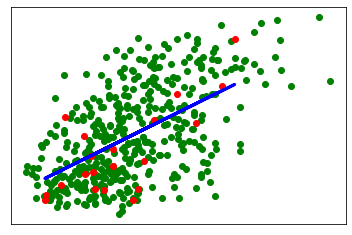

In [9]:
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color='green')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()